In [10]:
import matplotlib.pyplot as plt
import requests
import pandas as pd
import numpy as np
from config import api_key
from pathlib import Path

# File to Load
San_Fran_Reports_to_load = "Summary Crime Reports/San_Fran_Reports.csv"
Denver_Reports_to_load = "Summary Crime Reports/Denver_Reports.csv"
Travis_Reports_to_load = "Summary Crime Reports/Travis_Reports.csv"
Mecklenburg_Reports_to_load = "Summary Crime Reports/Mecklenburg_Reports.csv"

# Read Summary Data Files and store into Pandas DataFrames

San_Fran_Reports = pd.read_csv(San_Fran_Reports_to_load)
Denver_Reports = pd.read_csv(Denver_Reports_to_load)
Travis_Reports = pd.read_csv(Travis_Reports_to_load)
Mecklenburg_Reports = pd.read_csv(Mecklenburg_Reports_to_load)

#
crime_summary = pd.merge(San_Fran_Reports,Denver_Reports, how = "left", on = "series", suffixes = ("", " Denver"))
crime_summary = pd.merge(crime_summary, Travis_Reports, how = "left", on = "series", suffixes = ("", " Travis"))
crime_summary = pd.merge(crime_summary, Mecklenburg_Reports, how = "left", on = "series", suffixes = (" San Francisco", " Mecklenburg"))
crime_summary

,series,2012 San Francisco,2013 San Francisco,2014 San Francisco,2015 San Francisco,2016 San Francisco,2017 San Francisco,2018 San Francisco,2019 San Francisco,2020 San Francisco,...,2013 Mecklenburg,2014 Mecklenburg,2015 Mecklenburg,2016 Mecklenburg,2017 Mecklenburg,2018 Mecklenburg,2019 Mecklenburg,2020 Mecklenburg,2021 Mecklenburg,2022 Mecklenburg
0,Reported,5777,7064,6761,6710,6190,6301,6144,5933,4796,...,5093,5054,5948,6560,6304,6482,6998,8027,7502,7132
1,Cleared,1654,2336,2066,2046,2225,1981,2083,1994,1472,...,2343,2240,2527,2688,2755,2201,2878,3138,3062,2548


In [11]:
crime_summary_complete=crime_summary.drop(columns = ['2012 San Francisco','2013 San Francisco', '2014 San Francisco','2021 San Francisco','2012 Denver', '2013 Denver', '2014 Denver', 
                                                 '2012 Travis', '2013 Travis', '2014 Travis','2012 Mecklenburg', '2013 Mecklenburg', '2014 Mecklenburg', '2022 San Francisco', '2022 Denver', '2021 Travis', '2022 Travis', '2021 Mecklenburg', '2022 Mecklenburg'])

In [12]:
#Showcase all the counties with years ranging from 2015 - 2020
crime_summary_complete.columns

Index(['series', '2015 San Francisco', '2016 San Francisco',
       '2017 San Francisco', '2018 San Francisco', '2019 San Francisco',
       '2020 San Francisco', '2015 Denver', '2016 Denver', '2017 Denver',
       '2018 Denver', '2019 Denver', '2020 Denver', '2015 Travis',
       '2016 Travis', '2017 Travis', '2018 Travis', '2019 Travis',
       '2020 Travis', '2015 Mecklenburg', '2016 Mecklenburg',
       '2017 Mecklenburg', '2018 Mecklenburg', '2019 Mecklenburg',
       '2020 Mecklenburg'],
      dtype='object')

In [13]:
#swit
crime_summary_complete = crime_summary_complete.set_index("series")
crime_summary_complete = crime_summary_complete.transpose() 
crime_summary_complete


series,Reported,Cleared
2015 San Francisco,6710,2046
2016 San Francisco,6190,2225
2017 San Francisco,6301,1981
2018 San Francisco,6144,2083
2019 San Francisco,5933,1994
2020 San Francisco,4796,1472
2015 Denver,4399,2044
2016 Denver,4602,2310
2017 Denver,4840,2568
2018 Denver,5313,2900


<Axes: >

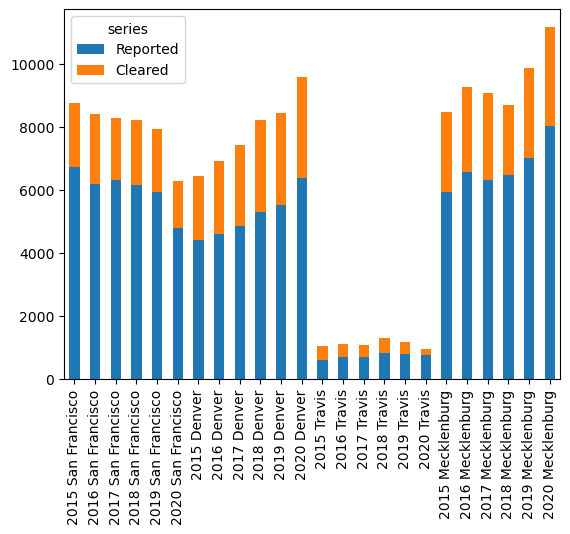

In [14]:
crime_summary_complete.groupby(['Reported', 'Cleared'])
crime_summary_complete.plot(kind='bar', stacked=True)

In [57]:
#Call the individual report
San_Fran_Reports

,series,2012,2013,2014,2015,2016,2017,2018,2019,2020,2022
0,Reported,5777,7064,6761,6710,6190,6301,6144,5933,4796,5323
1,Cleared,1654,2336,2066,2046,2225,1981,2083,1994,1472,1473


In [20]:
#Filter out the years for the county. Years 2015-2020
San_Fran_Filtered = San_Fran_Reports[["2015", "2016", "2017", "2018", "2019", "2020"]]
San_Fran_Filtered


,2015,2016,2017,2018,2019,2020
0,6710,6190,6301,6144,5933,4796
1,2046,2225,1981,2083,1994,1472


In [16]:
#Transpose the Dataset
San_Fran_Reports_Filtered = San_Fran_Filtered.transpose()
San_Fran_Reports_Filtered

,0,1
2015,6710,2046
2016,6190,2225
2017,6301,1981
2018,6144,2083
2019,5933,1994
2020,4796,1472


In [18]:
#Rename the columns and filter them out
San_Fran_Reports_Filtered = San_Fran_Reports_Filtered.rename(columns={0: 'Reported', 1: 'Cleared'})
San_Fran_Reports_Filtered

,Reported,Cleared
2015,6710,2046
2016,6190,2225
2017,6301,1981
2018,6144,2083
2019,5933,1994
2020,4796,1472


,Reported,Cleared
2015,6710,2046
2016,6190,2225
2017,6301,1981
2018,6144,2083
2019,5933,1994
2020,4796,1472


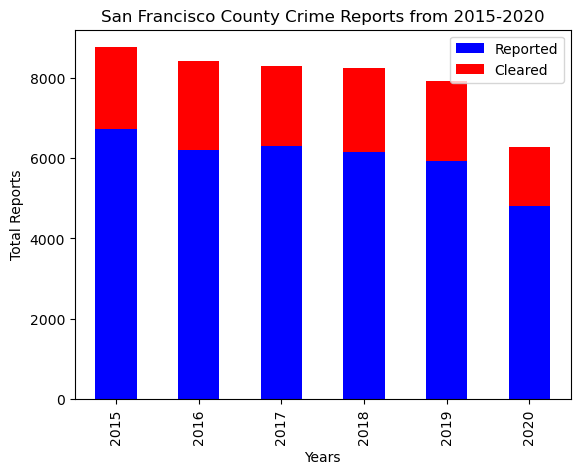

In [68]:
#Show Stacked Bar Graph
San_Fran_Reports_Filtered.plot(kind='bar', color={"blue","red"}, stacked=True)
plt.title("San Francisco County Crime Reports from 2015-2020")
plt.xlabel("Years")
plt.ylabel("Total Reports")
San_Fran_Reports_Filtered
#plt.savefig("/San Fran Reports.png")

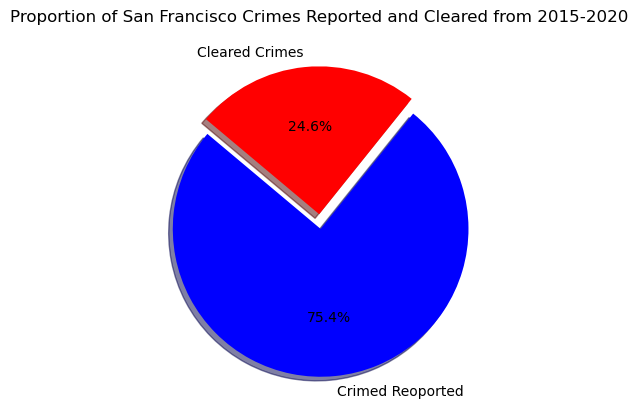

In [58]:
#pie chart showing sum of reported and sum of cleared cases in San Francisco
# Labels for the sections of our pie chart
SanFran_reported = [6710, 6190, 6301, 6144, 5933, 4796]

SanFran_cleared = [2046, 2225, 1981, 2083, 1994, 1472]

labels = ["Crimed Reoported", "Cleared Crimes"]

# The values of each section of the pie chart
sizes = [sum(SanFran_reported), sum(SanFran_cleared)]

# The colors of each section of the pie chart
colors = ["blue","red"]

# Tells matplotlib to separate the "Humans" section from the others
explode = (0.1, 0)

# Creates the pie chart based upon the values above
# Automatically finds the percentages of each part of the pie chart
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.title("Proportion of San Francisco Crimes Reported and Cleared from 2015-2020")

plt.show()


In [35]:
Denver_Reports

,series,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,Reported,3885,4093,4002,4399,4602,4840,5313,5511,6378,6919,7545
1,Cleared,1890,2215,2033,2044,2310,2568,2900,2925,3187,3520,3658


In [36]:
#Filter out the years for the county. Years 2015-2020
Denver_Filtered = Denver_Reports[["2015", "2016", "2017", "2018", "2019", "2020"]]
Denver_Filtered

,2015,2016,2017,2018,2019,2020
0,4399,4602,4840,5313,5511,6378
1,2044,2310,2568,2900,2925,3187


In [39]:
#Transpose the Dataset
Denver_Reports_Filtered = Denver_Filtered.transpose()
Denver_Reports_Filtered

,0,1
2015,4399,2044
2016,4602,2310
2017,4840,2568
2018,5313,2900
2019,5511,2925
2020,6378,3187


In [40]:
#Rename the columns and filter them out
Denver_Reports_Filtered = Denver_Reports_Filtered.rename(columns={0: 'Reported', 1: 'Cleared'})
Denver_Reports_Filtered

,Reported,Cleared
2015,4399,2044
2016,4602,2310
2017,4840,2568
2018,5313,2900
2019,5511,2925
2020,6378,3187


,Reported,Cleared
2015,4399,2044
2016,4602,2310
2017,4840,2568
2018,5313,2900
2019,5511,2925
2020,6378,3187


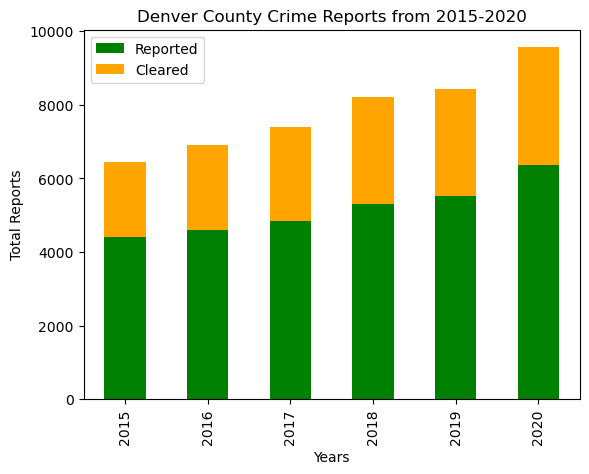

In [69]:
#Show Stacked Bar Graph
Denver_Reports_Filtered.plot(kind='bar', color={"green","orange"}, stacked=True)
plt.title("Denver County Crime Reports from 2015-2020")
plt.xlabel("Years")
plt.ylabel("Total Reports")
Denver_Reports_Filtered

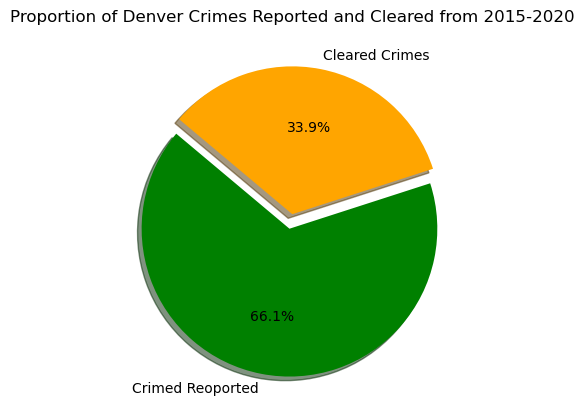

In [43]:
#pie chart showing sum of reported and sum of cleared cases in Denver County 
# Labels for the sections of our pie chart
Den_reported = [4399, 4602, 4840, 5313, 5511, 6378]
Den_cleared = [2044, 2310, 2568, 2900, 2925, 3187]
labels = ["Crimed Reoported", "Cleared Crimes"]

# The values of each section of the pie chart
sizes = [sum(Den_reported), sum(Den_cleared)]

# The colors of each section of the pie chart
colors = ["green","orange"]

# Tells matplotlib to separate the "Humans" section from the others
explode = (0.1, 0)

# Creates the pie chart based upon the values above
# Automatically finds the percentages of each part of the pie chart
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.title("Proportion of Denver Crimes Reported and Cleared from 2015-2020")

plt.show()

In [44]:
Travis_Reports

,series,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,Reported,448,487,537,613,684,692,837,795,768,801,860
1,Cleared,327,344,385,423,424,389,463,389,198,217,211


In [45]:
#Filter out the years for the county. Years 2015-2020
Travis_Filtered = Travis_Reports[["2015", "2016", "2017", "2018", "2019", "2020"]]
Travis_Filtered

,2015,2016,2017,2018,2019,2020
0,613,684,692,837,795,768
1,423,424,389,463,389,198


In [46]:
#Transpose the Dataset
Travis_Reports_Filtered = Travis_Filtered.transpose()
Travis_Reports_Filtered

,0,1
2015,613,423
2016,684,424
2017,692,389
2018,837,463
2019,795,389
2020,768,198


In [47]:
#Rename the columns and filter them out
Travis_Reports_Filtered = Travis_Reports_Filtered.rename(columns={0: 'Reported', 1: 'Cleared'})
Travis_Reports_Filtered

,Reported,Cleared
2015,613,423
2016,684,424
2017,692,389
2018,837,463
2019,795,389
2020,768,198


,Reported,Cleared
2015,613,423
2016,684,424
2017,692,389
2018,837,463
2019,795,389
2020,768,198


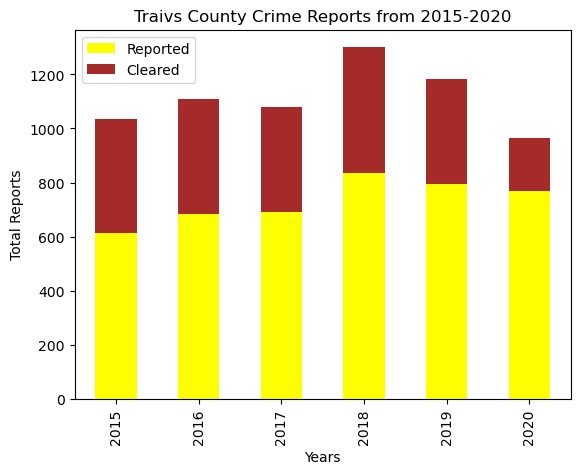

In [66]:
#Show Stacked Bar Graph
Travis_Reports_Filtered.plot(kind='bar', color={"yellow","brown"}, stacked=True)
plt.title("Traivs County Crime Reports from 2015-2020")
plt.xlabel("Years")
plt.ylabel("Total Reports")
Travis_Reports_Filtered

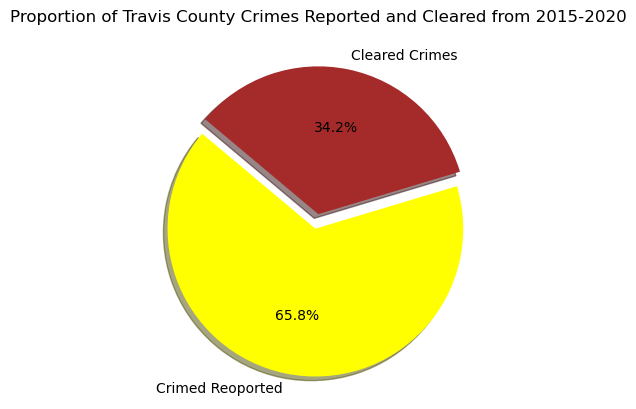

In [49]:
#pie chart showing sum of reported and sum of cleared cases in Travis County
# Labels for the sections of our pie chart
Trav_reported = [613, 684, 692, 837, 795, 768]
Trav_cleared = [423, 424, 389, 463, 389, 198]
labels = ["Crimed Reoported", "Cleared Crimes"]

# The values of each section of the pie chart
sizes = [sum(Trav_reported), sum(Trav_cleared)]

# The colors of each section of the pie chart
colors = ["yellow","brown"]

# Tells matplotlib to separate the "Humans" section from the others
explode = (0.1, 0)

# Creates the pie chart based upon the values above
# Automatically finds the percentages of each part of the pie chart
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.title("Proportion of Travis County Crimes Reported and Cleared from 2015-2020")

plt.show()

In [50]:
Mecklenburg_Reports

,series,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,Reported,5238,5093,5054,5948,6560,6304,6482,6998,8027,7502,7132
1,Cleared,2563,2343,2240,2527,2688,2755,2201,2878,3138,3062,2548


In [51]:
#Filter out the years for the county. Years 2015-2020
Mecklenburg_Filtered = Mecklenburg_Reports[["2015", "2016", "2017", "2018", "2019", "2020"]]
Mecklenburg_Filtered

,2015,2016,2017,2018,2019,2020
0,5948,6560,6304,6482,6998,8027
1,2527,2688,2755,2201,2878,3138


In [52]:
#Transpose the Dataset
Mecklenburg_Reports_Filtered = Mecklenburg_Filtered.transpose()
Mecklenburg_Reports_Filtered

,0,1
2015,5948,2527
2016,6560,2688
2017,6304,2755
2018,6482,2201
2019,6998,2878
2020,8027,3138


In [53]:
#Rename the columns and filter them out
Mecklenburg_Reports_Filtered = Mecklenburg_Reports_Filtered.rename(columns={0: 'Reported', 1: 'Cleared'})
Mecklenburg_Reports_Filtered

,Reported,Cleared
2015,5948,2527
2016,6560,2688
2017,6304,2755
2018,6482,2201
2019,6998,2878
2020,8027,3138


,Reported,Cleared
2015,5948,2527
2016,6560,2688
2017,6304,2755
2018,6482,2201
2019,6998,2878
2020,8027,3138


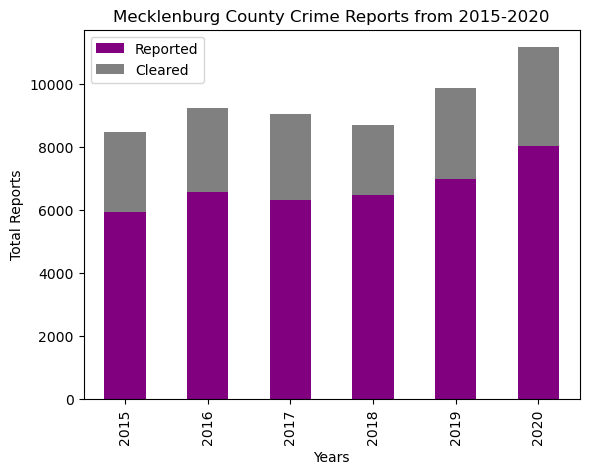

In [67]:
#Show Stacked Bar Graph
Mecklenburg_Reports_Filtered.plot(kind='bar', color={"purple","grey"}, stacked=True)
plt.title("Mecklenburg County Crime Reports from 2015-2020")
plt.xlabel("Years")
plt.ylabel("Total Reports")
Mecklenburg_Reports_Filtered

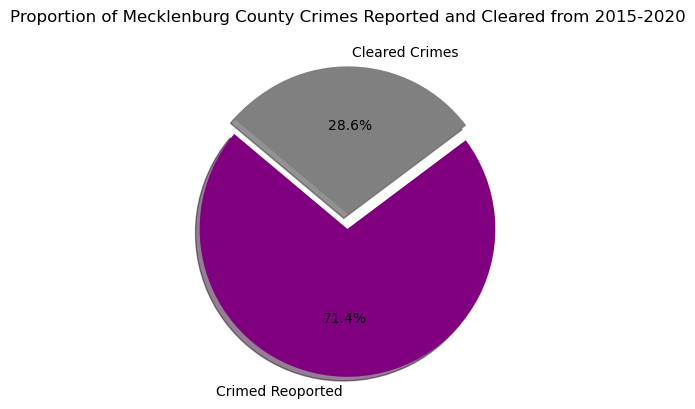

In [56]:
#pie chart showing sum of reported and sum of cleared cases in Mecklenburg County
# Labels for the sections of our pie chart
Meck_reported = [5948, 6560, 6304, 6482, 6998, 8027]
Meck_cleared = [2527, 2688, 2755, 2201, 2878, 3138]

labels = ["Crimed Reoported", "Cleared Crimes"]

# The values of each section of the pie chart
sizes = [sum(Meck_reported), sum(Meck_cleared)]

# The colors of each section of the pie chart
colors = ["purple", "grey"]

# Tells matplotlib to separate the "Humans" section from the others
explode = (0.1, 0)

# Creates the pie chart based upon the values above
# Automatically finds the percentages of each part of the pie chart
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.title("Proportion of Mecklenburg County Crimes Reported and Cleared from 2015-2020")

plt.show()